In [22]:
import h5py
import numpy as np

# Paths to HDF5 files
hdf5_path = (
    "/media/siddhesh/D1-k/Kaggle-Ovarian/output_overlap_folder/combined.hdf5"
)

def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print("    %s: %s" % (key, val))

# Open the HDF5 file and read data into variables
with h5py.File(hdf5_path, "r") as output_hdf5_file:
    print("Groups in the output HDF5 file:", list(output_hdf5_file.keys()))

    # Check if lengths of coordinates and patches are the same for each image
    patches_group = output_hdf5_file["patches"]
    coordinates_group = output_hdf5_file["coordinates"]
    for key in patches_group.keys():
        print(
            "Length of coordinates and patches for image",
            key,
            "are",
            len(coordinates_group[key]),
            "and",
            len(patches_group[key]),
            "respectively",
        )



Groups in the output HDF5 file: ['coordinates', 'patches']
Length of coordinates and patches for image 10077 are 108 and 108 respectively
Length of coordinates and patches for image 10143 are 90 and 90 respectively
Length of coordinates and patches for image 1020 are 64 and 64 respectively
Length of coordinates and patches for image 10246 are 99 and 99 respectively
Length of coordinates and patches for image 10252 are 99 and 99 respectively
Length of coordinates and patches for image 10469 are 60 and 60 respectively
Length of coordinates and patches for image 10548 are 114 and 114 respectively
Length of coordinates and patches for image 10642 are 160 and 160 respectively
Length of coordinates and patches for image 1080 are 35 and 35 respectively
Length of coordinates and patches for image 10800 are 63 and 63 respectively
Length of coordinates and patches for image 10896 are 99 and 99 respectively
Length of coordinates and patches for image 1101 are 24 and 24 respectively
Length of coor

In [23]:

# Open both HDF5 files in a single `with` statement
hdf5_file = h5py.File(hdf5_path, "r")

# Load patch data from the first HDF5 file
patch_key = "10077"
query_patch_data = hdf5_file["patches"][patch_key][63]

print(patch_key, query_patch_data.shape)

# Select the corresponding coordinates from the second HDF5 file
all_coordinates_selected_patch = hdf5_file["coordinates"][patch_key][63]

# get the coordinates of the patch
print(all_coordinates_selected_patch)
print(
    "Coordinates of the patch:",
    all_coordinates_selected_patch,
)



10077 (1, 192)
[20480 12288]
Coordinates of the patch: [20480 12288]


In [24]:
from heapq import heappush, heappop

image_patch_data = hdf5_file["patches"][patch_key]

for query_patch_data in image_patch_data:
    # Iterate over keys in the coordinates HDF5 file
    for key in hdf5_file["patches"].keys():
        print("Key:", key)

        # Initialize a min-heap to store the top 3 minimum distances and corresponding indices
        min_distances_heap = []

        # Fetch all coordinates for the current key
        coordinates = hdf5_file["coordinates"][key]

        # Iterate over patches in the current selected key
        for index, patch in enumerate(hdf5_file["patches"][key]):
            # Compute the distance between query_patch_data and the patch
            distance = np.linalg.norm(query_patch_data - patch)

            # If the heap size is less than 3 or the current distance is smaller than the largest distance in heap
            if len(min_distances_heap) < 3 or distance < -min_distances_heap[0][0]:
                # Add the current distance and index to the heap
                # Note: heap is a min-heap, so we negate the distance to simulate a max-heap
                heappush(min_distances_heap, (-distance, index))

                # If heap size grows beyond 3, remove the largest distance
                if len(min_distances_heap) > 3:
                    heappop(min_distances_heap)

        # Sort heap by distance
        sorted_heap = sorted(min_distances_heap, key=lambda x: x[0])

        print(f"Top 3 minimum distances for image {key} are:")
        for distance, index in sorted_heap:
            print(
                f"Minimum distance: {-distance}, for coordinates: {coordinates[index]}"
            )


Key: 10077
Top 3 minimum distances for image 10077 are:
Minimum distance: 6.995517253875732, for coordinates: [24576 20480]
Minimum distance: 6.5636091232299805, for coordinates: [16384 12288]
Minimum distance: 0.0, for coordinates: [20480 12288]
Key: 10143
Top 3 minimum distances for image 10143 are:
Minimum distance: 27.95012664794922, for coordinates: [32768 12288]
Minimum distance: 27.619829177856445, for coordinates: [32768 24576]
Minimum distance: 27.58656883239746, for coordinates: [32768 20480]
Key: 1020
Top 3 minimum distances for image 1020 are:
Minimum distance: 24.76531410217285, for coordinates: [ 4096 16384]
Minimum distance: 24.638744354248047, for coordinates: [8192 4096]
Minimum distance: 24.175899505615234, for coordinates: [12288  4096]
Key: 10246
Top 3 minimum distances for image 10246 are:
Minimum distance: 24.741731643676758, for coordinates: [16384 28672]
Minimum distance: 24.19264793395996, for coordinates: [12288 20480]
Minimum distance: 24.123449325561523, for

In [30]:
from heapq import heappush, heappop
import numpy as np

# Initialize a dictionary to store the minimum distance and corresponding index for each image
min_distances_dict = {}

# Iterate over keys in the coordinates HDF5 file
for key in hdf5_file["patches"].keys():

    # Initialize variables to keep track of the minimum distance and corresponding index for the current image
    min_distance_for_image = float('inf')
    min_index_for_image = None

    # Fetch all coordinates for the current key
    coordinates = hdf5_file["coordinates"][key]

    # Iterate over patches in the current selected key
    for index, patch in enumerate(hdf5_file["patches"][key]):
        # Compute the distance between query_patch_data and the patch
        distance = np.linalg.norm(query_patch_data - patch)

        # Update the minimum distance and index for the current image if this distance is smaller
        if distance < min_distance_for_image:
            min_distance_for_image = distance
            min_index_for_image = index

    # Store the minimum distance and index for the current image in the dictionary
    min_distances_dict[key] = (min_distance_for_image, min_index_for_image)

# Select the top 10 unique images with the minimum distances
sorted_items = sorted(min_distances_dict.items(), key=lambda x: x[1][0])[:10]

print("Top 10 minimum distances are:")
for key, (distance, index) in sorted_items:
    print(
        f"Minimum distance: {distance}, for image: {key}, coordinates: {hdf5_file['coordinates'][key][index]}"
    )


Top 10 minimum distances are:
Minimum distance: 0.0, for image: 10077, coordinates: [20480 12288]
Minimum distance: 12.256651878356934, for image: 50304, coordinates: [16384 36864]
Minimum distance: 13.331177711486816, for image: 14532, coordinates: [20480  8192]
Minimum distance: 13.500314712524414, for image: 31297, coordinates: [28672 40960]
Minimum distance: 13.62409496307373, for image: 40124, coordinates: [16384  8192]
Minimum distance: 14.972031593322754, for image: 56993, coordinates: [24576 20480]
Minimum distance: 15.053902626037598, for image: 32042, coordinates: [12288  4096]
Minimum distance: 15.191282272338867, for image: 30515, coordinates: [16384 69632]
Minimum distance: 15.358596801757812, for image: 15742, coordinates: [16384 20480]
Minimum distance: 15.617840766906738, for image: 40503, coordinates: [12288 49152]


In [35]:
# Now access these images from the train_folder and visualize these image patches as well as the query patch in a grid

import time
import PIL
import os
from skimage.io import imread

# Maximum allowed image size in pixels (adjust as needed)
PIL.Image.MAX_IMAGE_PIXELS = 21503024400


# Read all the images, find the patch and append it to a list and plot the grid
image_patches = []

train_folder = "/media/siddhesh/D1-k/Kaggle-Ovarian/train_images/"

# Iterate over the top 10 minimum distance images, open them, then find the patch of the image from the coordinates and create a patch of 4096x4096 and append it to the list
# Then plot the grid

for key, (distance, index) in sorted_items:
    print("Reading image:", key)
    start = time.time()
    image_path = os.path.join(train_folder, key+".png")
    image = imread(image_path)
    end = time.time()
    coordinates = hdf5_file["coordinates"][key][index]
    patch = image[
                coordinates[0]:coordinates[0] + 4096,
                coordinates[1]:coordinates[1] + 4096,
            ]
    
    image_patches.append(patch)
    print("Time taken to read and crop image:", end - start)

Reading image: 10077
Time taken to read and crop image: 47.6274950504303
Reading image: 50304
Time taken to read and crop image: 63.781200647354126
Reading image: 14532
Time taken to read and crop image: 34.76703691482544
Reading image: 31297
Time taken to read and crop image: 73.96290922164917
Reading image: 40124
Time taken to read and crop image: 39.85046696662903
Reading image: 56993
Time taken to read and crop image: 56.51644730567932
Reading image: 32042
Time taken to read and crop image: 20.165628671646118
Reading image: 30515
Time taken to read and crop image: 42.451045513153076
Reading image: 15742
Time taken to read and crop image: 67.85612487792969
Reading image: 40503
Time taken to read and crop image: 33.7585654258728


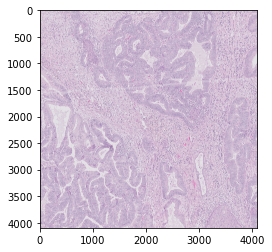

In [42]:
import matplotlib.pyplot as plt

# Plot the query patch for the image 10077 from the train folder
# At the coordinates of [20480,12288]
fig, axes = plt.figsize=(40, 16)

query_image = imread("/media/siddhesh/D1-k/Kaggle-Ovarian/train_images/10077.png")
query_patch = query_image[20480:20480+4096,12288:12288+4096]

plt.imshow(query_patch)
plt.show()

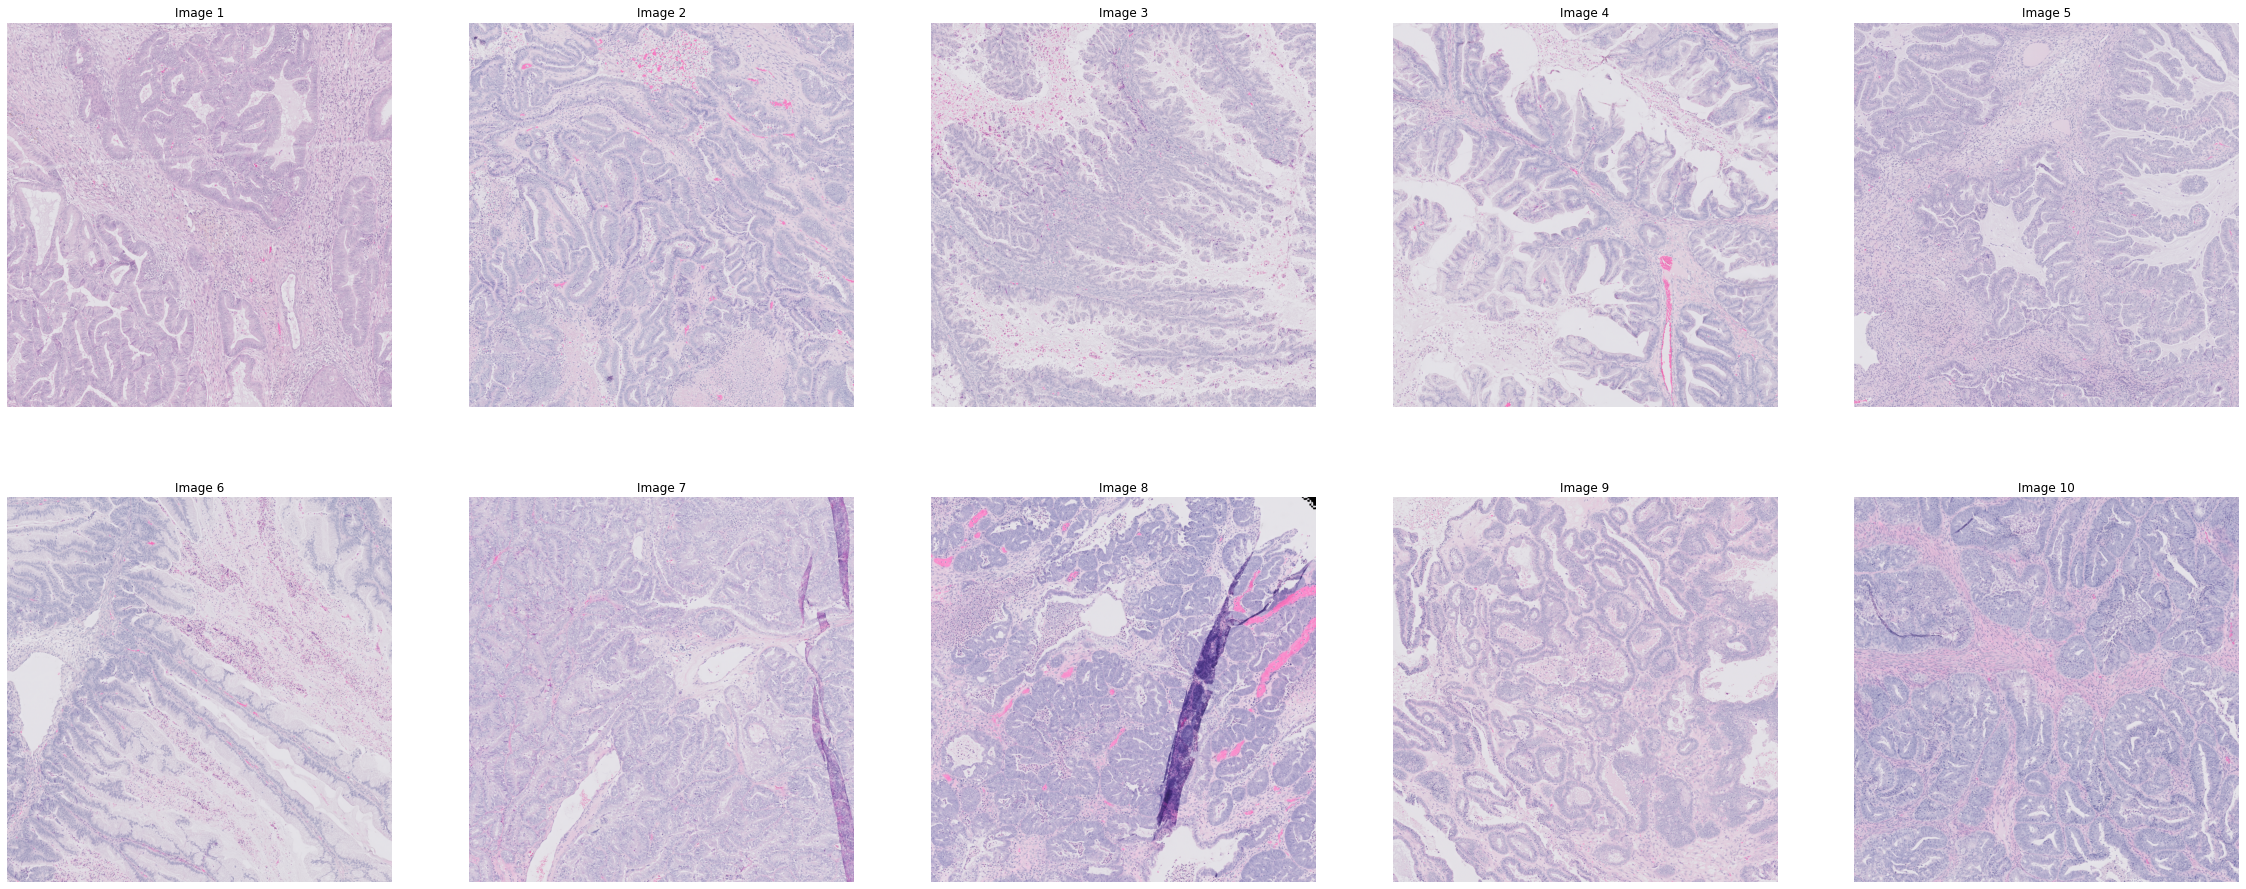

In [43]:
# Plot all the patches in a grid for the top 10 images stored in image_patches list

fig, axes = plt.subplots(2, 5, figsize=(40, 16))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(image_patches[i])
    axes[i].set_title(f"Image {i+1}")
    axes[i].set_axis_off()

plt.show()


In [45]:
import pandas as pd

df = pd.read_csv("/media/siddhesh/D2-K/Kaggle-Ovarian/train.csv")

for key, (distance, index) in sorted_items:
    print("Reading image:", key)

Reading image: 10077
Reading image: 50304
Reading image: 14532
Reading image: 31297
Reading image: 40124
Reading image: 56993
Reading image: 32042
Reading image: 30515
Reading image: 15742
Reading image: 40503


In [59]:
from collections import Counter

# Get the label for the query image key and print it
query_image_label = df[df["image_id"] == int(patch_key)].values[0][0]  # Extracting the first element
print("Label for the query image:", query_image_label)

# Initialize a list to store the labels for the top 10 images
labels = []

for key, (distance, index) in sorted_items:
    print("Reading image:", key)
    image_label = df[df["image_id"] == int(key)].values[0][1]  # Extracting the first element
    print("Label:", image_label)
    labels.append(image_label)  # Append the scalar value, not the array

# Use majority voting to determine the label for the query image
counter = Counter(labels)
most_common_label, _ = counter.most_common(1)[0]
print(f"The most common label among the top 10 images is: {most_common_label}")


Label for the query image: 10077
Reading image: 10077
Label: EC
Reading image: 50304
Label: EC
Reading image: 14532
Label: MC
Reading image: 31297
Label: MC
Reading image: 40124
Label: EC
Reading image: 56993
Label: MC
Reading image: 32042
Label: EC
Reading image: 30515
Label: EC
Reading image: 15742
Label: EC
Reading image: 40503
Label: EC
The most common label among the top 10 images is: EC
